In [2]:
import numpy as np
import matplotlib.pyplot as plt

## matplotlib API入门

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

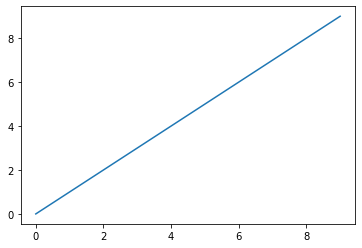

In [5]:
plt.plot(data)

### Figure和Subplot

matplotlib的图像都位于Figure对象中。你可以用`plt.figure`创建一个新的Figure：

> 提示：使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。
> 因此，对于复杂的图形，必须将所有的绘图命令存在一个小窗里。

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

不能通过空Figure绘图。必须用`add_subplot`创建一个或多个subplot才行：

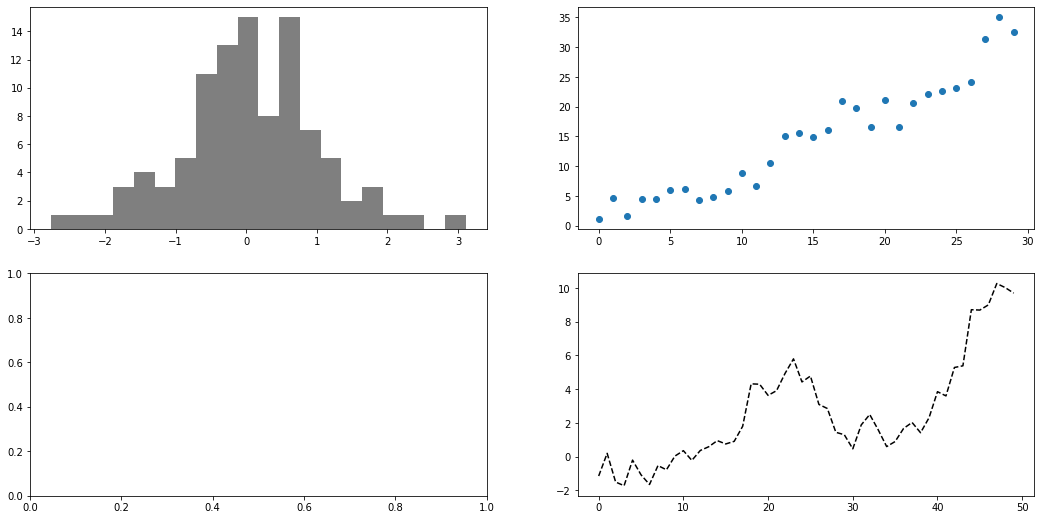

In [22]:
fig = plt.figure(figsize=(18, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.5)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

这段代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。
如果再把后面两个subplot也创建出来，最终得到的图像如图所示：

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

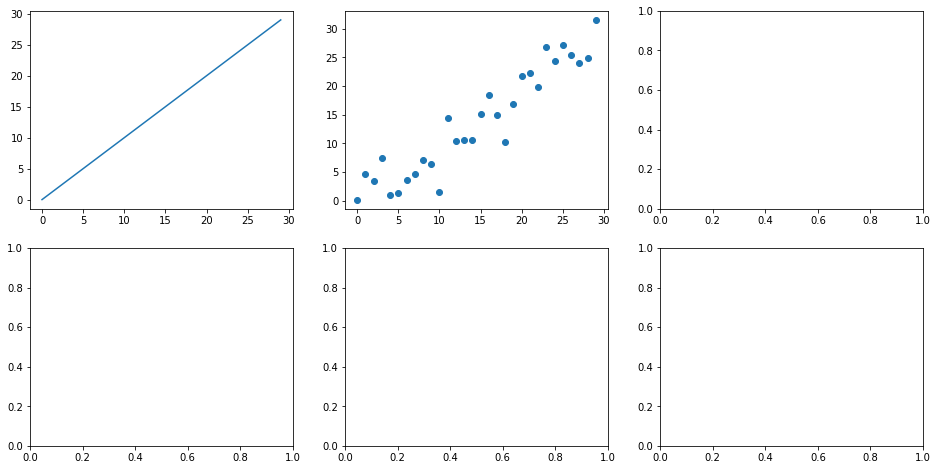

In [35]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axes[0, 0].plot(np.arange(30))

### 调整subplot周围的间距

在默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此如果调整了图像的高度和宽度，
间距也会自动调整。利用`Figure`的`subplots_adjust`方法可以轻松的修改间距：

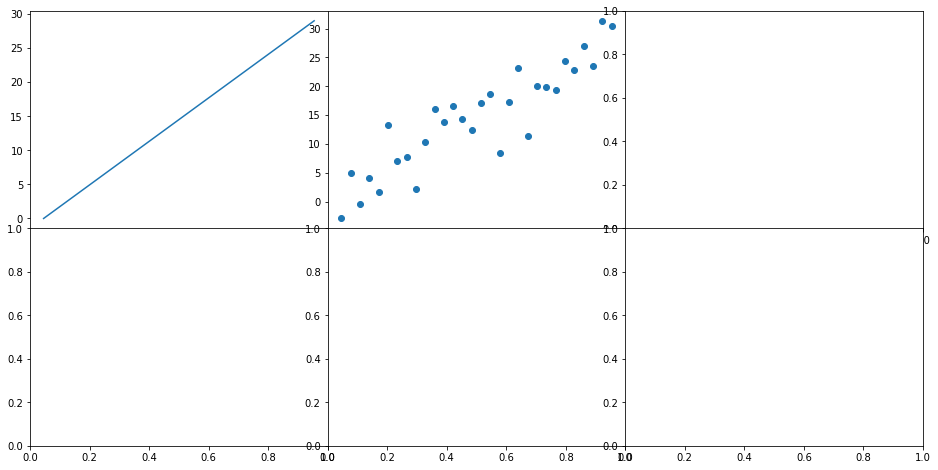

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0, 1].scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
axes[0, 0].plot(np.arange(30))

plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型

matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

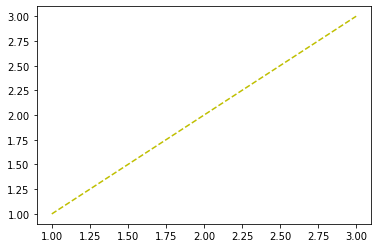

In [37]:
plt.plot([1, 2, 3], [1, 2, 3], 'y--')

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。
通过下面这种更为明确的方式也能得到同样的效果：

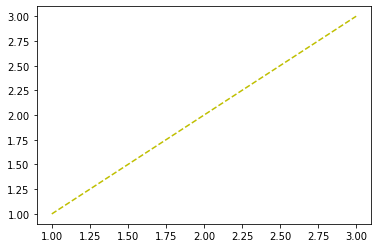

In [40]:
plt.plot([1, 2, 3], [1, 2, 3], lineStyle='--', color='y')

常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。

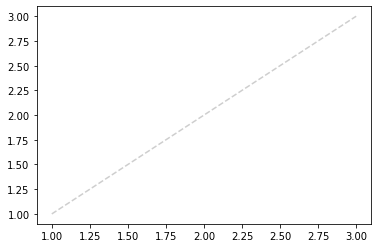

In [43]:
plt.plot([1, 2, 3], [1, 2, 3], lineStyle='--', color='#CECECE')

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。
标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面

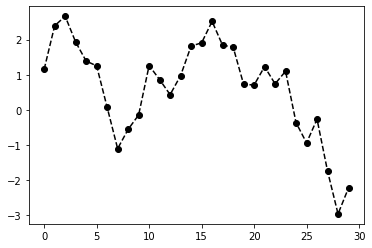

In [44]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

还可以将其写成更为明确的形式：

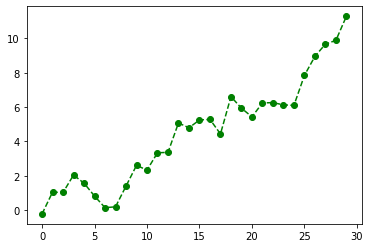

In [54]:
plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改

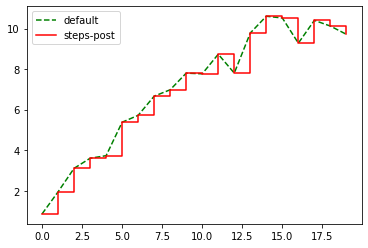

In [62]:
data = np.random.randn(20).cumsum()

plt.plot(data, color='g', label='default', linestyle='dashed')
plt.plot(data, color='r', label='steps-post', drawstyle='steps-post')
plt.legend(loc='best')

### 设置标题、刻度和图例

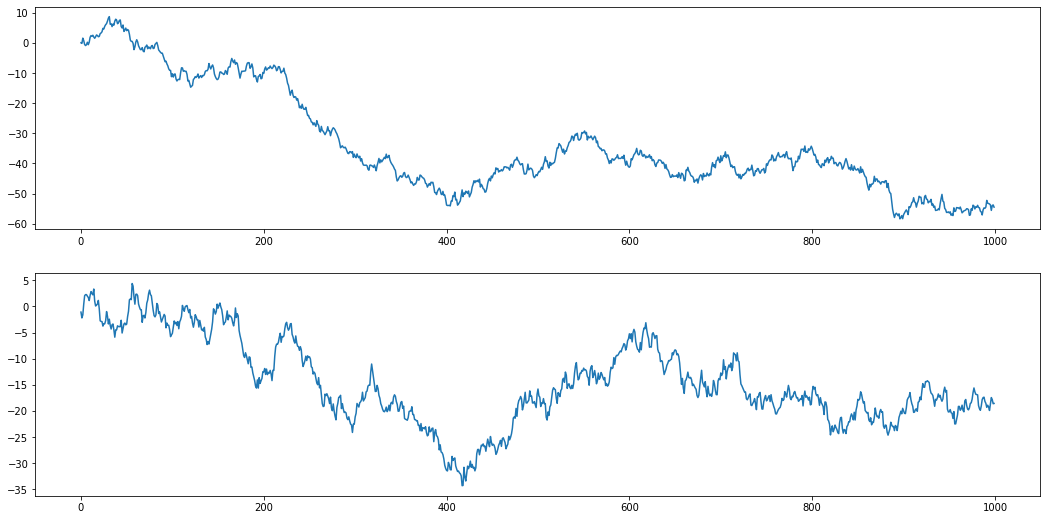

In [76]:
data = np.random.randn(1000).cumsum()
fig, axes = plt.subplots(2, 1, figsize=(18, 9))
axes[0].plot(np.random.randn(1000).cumsum())
axes[1].plot(data)

要改变x轴刻度，最简单的办法是使用`set_xticks`和`set_xticklabels`。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，
默认情况下，这些位置也就是刻度标签。但我们可以通过`set_xticklabels`将任何其他的值用作标签：

Text(0.5, 1.0, 'title')

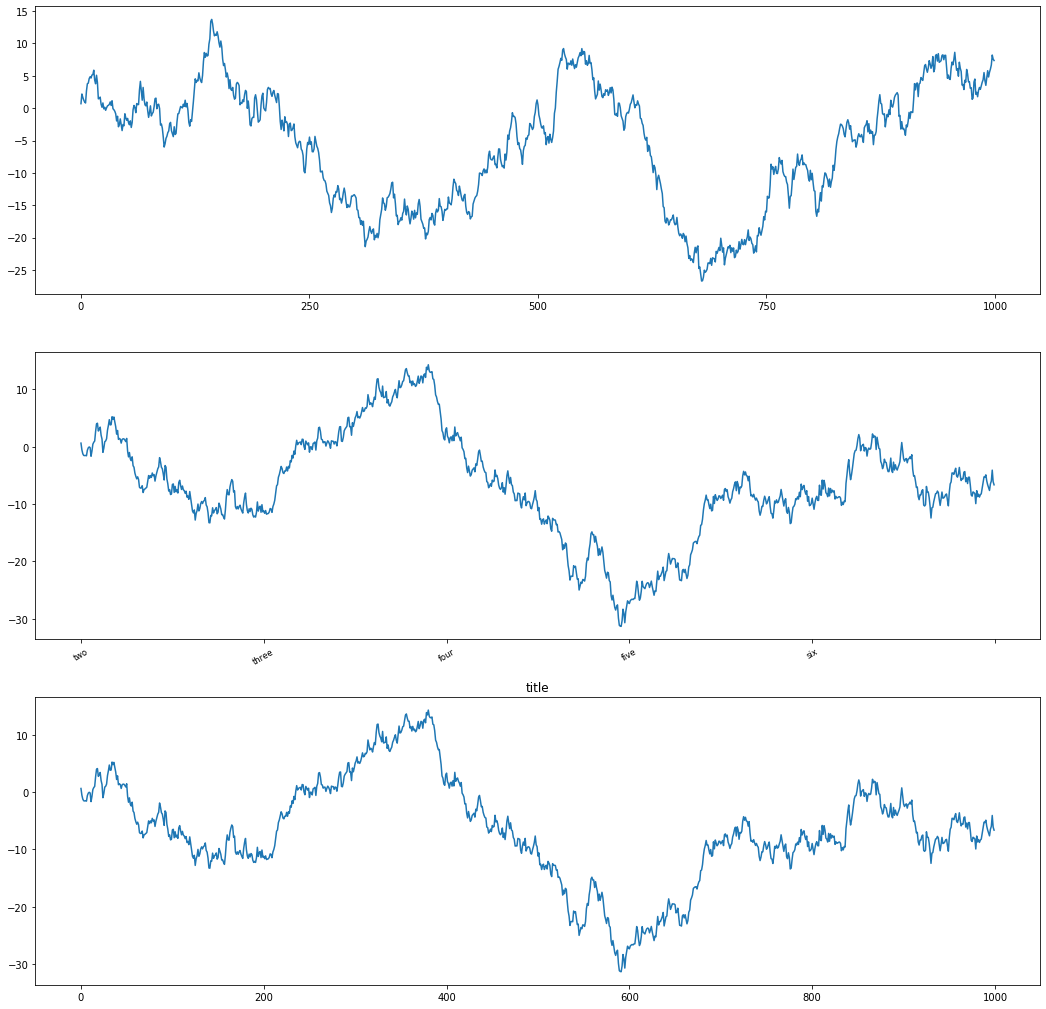

In [87]:
data = np.random.randn(1000).cumsum()
fig, axes = plt.subplots(3, 1, figsize=(18, 18))
axes[0].plot(np.random.randn(1000).cumsum())
axes[1].plot(data)
axes[2].plot(data)
axes[0].set_xticks([0, 250, 500, 750, 1000])
axes[1].set_xticklabels(['one', 'two', 'three', 'four', 'five', 'six'], rotation=30, fontsize='small')
axes[2].set_title('title')
axes[2].set_xlabel('x_label')

图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加`subplot`的时候传入`label`参数：

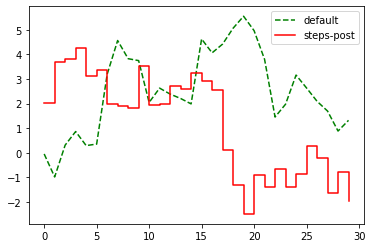

In [88]:
plt.plot(np.random.randn(30).cumsum(), color='g', label='default', linestyle='dashed')
plt.plot(np.random.randn(30).cumsum(), color='r', label='steps-post', drawstyle='steps-post')
plt.legend(loc='best')

### 将图表保存到文件

利用`plt.savefig`可以将当前图表保存到文件。该方法相当于Figure对象的实例方法`savefig`。例如，要将图表保存为SVG文件，你只需输入：

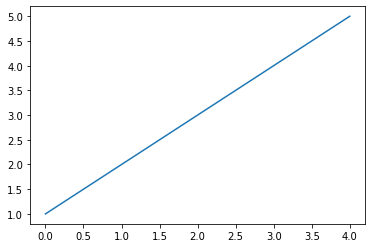

In [91]:
plt.plot([1, 2, 3, 4, 5])
plt.savefig('line.svg')

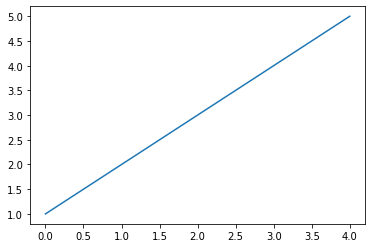

In [96]:
plt.plot([1, 2, 3, 4, 5])
plt.savefig('line.png', bbox_inches='tight')

`savefig`参数说明：

|参数|说明|
|----|----|
|`filename`|含有文件路径的字符串或 Python的文件型对象。图像格式由文件扩展名推断得出，例如，pdf推断出PDF,png推断出PNG|
|`dpi`|图像分辨率（每英寸点数），默认为100|
|`facecolor、edgecolor`|图像的背景色，默认为“w”（白色）|
|`format`| 显式设置文件格式（“png”、“pdf”、“svg”）|
|`bbox_inches`|图表需要保存的部分。如果设置为 `tight`，则将尝试剪除图表周围的空白部分|